In [4]:
import pandas as pd
import numpy as np
import timeit
from kernel_fca_oo import LexiSystem
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [5]:

#data = pd.read_csv(KATALOOG+"cmp-bin-grocery.csv", sep=',', index_col=0, encoding='latin1')

In [6]:
c_i = range(0, 12)
KATALOOG = "..\\"

fns = ["cmp-bin-zoo.csv",
       "cmp-bin-iapb09.csv",
       "cmp-bin-STT_majandus.csv",
       "cmp-bin-TTTH_kardlaga.csv",
       "cmp-bin-grocery.csv", 
       "cmp-bin-ecommerce-sampled.csv", 
       "cmp-bin-house-votes-84.csv",
       "cmp-bin-instacart-600-sample.csv",
       "cmp-bin-student-gradings.csv"]

for fn in fns:
    print("\nFile:", fn)
        
    data = pd.read_csv(KATALOOG+fn, sep=',', index_col=0, encoding='latin1')
    result_df = pd.DataFrame(columns = ["time"] + ["c"+str(i) for i in c_i])
    #systems = {"MS": FCASystemDF(data), "FL": FreqLexiSeriateSystem(data)}
    systems = {#"MS": FCASystemDF(data), 
        "CL": LexiSystem(data), 
        "FL": LexiSystem(data, transform="FL"),
        "CLr": LexiSystem(data, refill=True),
        "FLr": LexiSystem(data, transform="FL", refill=True)}
    #for i in range(2, 13, 2):
    #    systems["KM"+str(i)] = KMeansSystem(data, n_chains=i)
    for s_name, system in systems.items():
        start = timeit.default_timer()
        _, uc =  system.conceptchaincover(uncovered=0.0, max_cc=12)
        time = timeit.default_timer() - start
        if len(uc) < len(c_i):
            uc += [np.nan] * (len(c_i) - len(uc))  
        result_df.loc[s_name] = [time] + uc[:len(c_i)]
    #[uc for (_, uc) in zip(system.conceptchaincover())]
    display(result_df)
    result_df.to_csv(path_or_buf=KATALOOG+"res-"+fn)


File: cmp-bin-zoo.csv


,time,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
CL,0.180936,0.574242,0.443939,0.225758,0.154545,0.098485,0.048485,0.031818,0.018182,0.012121,0.006061,0.0,0.0
FL,0.205524,0.581818,0.445455,0.240909,0.168182,0.128788,0.081818,0.048485,0.034848,0.022727,0.009091,0.0,0.0
CLr,0.188121,0.574242,0.443939,0.225758,0.154545,0.098485,0.048485,0.031818,0.013636,0.007576,0.001515,0.0,0.0
FLr,0.183646,0.581818,0.445455,0.240909,0.168182,0.128788,0.078788,0.045455,0.031818,0.018182,0.006061,0.0,0.0



File: cmp-bin-iapb09.csv


,time,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
CL,0.771458,0.256524,0.187090,0.168778,0.137342,0.118266,0.092935,0.080574,0.069586,0.061193,0.054174,0.048680,0.043186
FL,0.749893,0.288418,0.239585,0.224477,0.151228,0.131390,0.103159,0.090798,0.075996,0.068366,0.058599,0.046391,0.039982
CLr,0.674547,0.256524,0.182970,0.150771,0.123913,0.104837,0.087136,0.070197,0.059210,0.049596,0.041050,0.034946,0.029757
FLr,0.694638,0.288418,0.236991,0.206928,0.146040,0.127575,0.115214,0.086830,0.070197,0.063025,0.051122,0.043339,0.038761



File: cmp-bin-STT_majandus.csv


,time,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
CL,1.754438,0.474560,0.449603,0.441091,0.416328,0.360611,0.312633,0.286322,0.268137,0.253240,0.232927,0.220932,0.203908
FL,1.678206,0.472432,0.409557,0.373186,0.358677,0.344554,0.329851,0.313794,0.293287,0.281292,0.268524,0.254014,0.246856
CLr,1.858450,0.474560,0.449603,0.441091,0.416328,0.360611,0.312633,0.286322,0.268137,0.253240,0.234668,0.219578,0.191720
FLr,1.655423,0.472432,0.409557,0.373186,0.358677,0.344554,0.329851,0.312440,0.290965,0.278390,0.259044,0.249565,0.241246



File: cmp-bin-TTTH_kardlaga.csv


,time,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
CL,0.704032,0.506842,0.415611,0.378611,0.337557,0.284845,0.249366,0.227065,0.202230,0.186011,0.179422,0.164724,0.154587
FL,0.681978,0.506842,0.446021,0.409529,0.391789,0.364927,0.340598,0.329448,0.309174,0.293462,0.227572,0.203751,0.191586
CLr,0.777054,0.506842,0.415611,0.378611,0.337557,0.284845,0.249366,0.227065,0.201723,0.184491,0.177902,0.164217,0.153573
FLr,0.700917,0.506842,0.446021,0.409529,0.391789,0.364927,0.340598,0.328941,0.308667,0.288900,0.277243,0.201723,0.155601



File: cmp-bin-grocery.csv


,time,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
CL,0.244611,0.828431,0.759804,0.710784,0.639706,0.595588,0.561275,0.526961,0.487745,0.453431,0.419118,0.394608,0.365196
FL,0.244140,0.828431,0.767157,0.703431,0.639706,0.578431,0.544118,0.512255,0.475490,0.443627,0.416667,0.392157,0.352941
CLr,0.262139,0.828431,0.759804,0.710784,0.637255,0.593137,0.558824,0.522059,0.492647,0.441176,0.406863,0.384804,0.362745
FLr,0.215427,0.828431,0.767157,0.700980,0.637255,0.575980,0.546569,0.522059,0.497549,0.473039,0.455882,0.441176,0.392157



File: cmp-bin-ecommerce-sampled.csv


,time,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
CL,1.184293,0.891988,0.812306,0.771138,0.727313,0.691899,0.649845,0.620629,0.584329,0.557769,0.528552,0.500221,0.470120
FL,1.137507,0.891988,0.812306,0.766711,0.727756,0.689243,0.653829,0.621514,0.589641,0.560425,0.532537,0.502435,0.471890
CLr,1.244269,0.891988,0.812306,0.771138,0.727313,0.692784,0.650730,0.621514,0.585215,0.554670,0.525896,0.495352,0.468349
FLr,1.219619,0.891988,0.812306,0.766711,0.727756,0.689243,0.653829,0.621514,0.589641,0.560425,0.532537,0.502435,0.471890



File: cmp-bin-house-votes-84.csv


,time,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
CL,0.365993,0.831950,0.727956,0.579876,0.364627,0.240664,0.182054,0.148859,0.107365,0.074170,0.053942,0.031898,0.018154
FL,0.339413,0.831172,0.696836,0.621110,0.511929,0.439834,0.382521,0.279046,0.238589,0.195539,0.129927,0.091546,0.045384
CLr,0.384042,0.831950,0.727956,0.605550,0.388745,0.231846,0.178164,0.147822,0.121369,0.092583,0.061463,0.043568,0.024378
FLr,0.386577,0.831172,0.696836,0.621110,0.510373,0.439315,0.383039,0.274118,0.199948,0.152230,0.090768,0.050311,0.031120



File: cmp-bin-instacart-600-sample.csv


,time,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
CL,1.115588,0.836632,0.794105,0.756632,0.726737,0.692000,0.666526,0.643579,0.616842,0.595789,0.578737,0.562526,0.539158
FL,1.096822,0.837895,0.796632,0.749263,0.715579,0.691579,0.665263,0.640421,0.620421,0.598737,0.578737,0.560000,0.544000
CLr,1.293392,0.836632,0.793895,0.754105,0.723158,0.690105,0.664000,0.646526,0.623579,0.599158,0.579579,0.562316,0.549474
FLr,1.290014,0.837895,0.795368,0.748632,0.715368,0.685053,0.659368,0.636632,0.614105,0.594526,0.572842,0.556211,0.542526



File: cmp-bin-student-gradings.csv


,time,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
CL,0.393194,0.600918,0.489613,0.419856,0.347037,0.280997,0.239449,0.200087,0.161382,0.134704,0.108244,0.085939,0.070195
FL,0.425294,0.600918,0.494642,0.419200,0.356440,0.295648,0.232889,0.204024,0.172316,0.143669,0.117647,0.091406,0.071069
CLr,0.556589,0.600918,0.489613,0.418544,0.351629,0.284277,0.231139,0.192871,0.153947,0.114586,0.098185,0.073912,0.053575
FLr,0.515150,0.600918,0.494642,0.415264,0.338727,0.293899,0.256068,0.203368,0.155040,0.130330,0.102777,0.083096,0.065821



File: cmp-bin-zoo.csv


NameError: name 'cc_nrs' is not defined

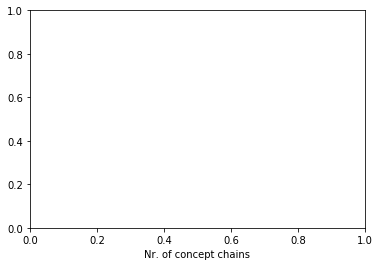

In [7]:
# MEDES article plots
KATALOOG = "..\\"

fns = ["cmp-bin-zoo.csv",
       "cmp-bin-house-votes-84.csv",
       "cmp-bin-iapb09.csv",
       "priv2.csv"
       ]
for fn in fns:
    print("\nFile:", fn)
    data = pd.read_csv(KATALOOG+fn, sep=',', index_col=0, encoding='latin1')
    systems = {#"MS": FCASystemDF(data), 
        "FL": LexiSystem(data, transform="FL"),
        "CLr": LexiSystem(data, refill=True)}

    for mode, (s_name, system) in zip(["g^--", "bs-"], systems.items()):
        plt.xlabel("Nr. of concept chains")
        plt.xticks(cc_nrs)
        _, uc =  system.conceptchaincover(uncovered=0.0, max_cc=12)
        uc = [1.0] + uc
        #if len(uc) < len(cc_nrs):
        #    uc += [0.0] * (len(cc_nrs) - len(uc)) 
        
        cc_nrs = range(len(uc))
        print(cc_nrs, uc, mode)
        plt.xticks(cc_nrs)
        plt.plot(cc_nrs, uc, mode)
    plt.legend(systems)
    plt.show()
        
    
    

In [ ]:
4000*0.625